# Exercise - Hadamard matrix multiplication with SVM

Hadamard matrix multiplication is where the values in matrices **D** and **E** at coordinates (i0,i1) are multiplied together to set the value at coordinates (i0,i1) in matrix **F**.

<figure style="margin-left:auto; margin-right:auto; width:80%;">
    <img style="vertical-align:middle" src="../images/elementwise_multiplication.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Elementwise multiplication of matrices D and E to get F.</figcaption>
</figure>

In this exercise we are going enable the elementwise matrix multiplication code to use fine-grained buffer Shared Virtual Memory (SVM). The source code to edit is located in [mat_elementwise_svm.cpp](mat_elementwise.cpp) and the kernel is in [kernels_elementwise.c](kernels_elementwise.c). Matrices **D** and **E** are read in from disk and matrix **F** is produced as the output. Your task is to tool up this code so that **array_F** is using fine-grained buffer SVM.

## Constructing the inputs and solution

As before, we construct input matrices and call them **D** and **E**.

In [3]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../include"))

import py_helper

%matplotlib widget

# Matrices D, E, F are of size (NROWS_F, NCOLS_F)
NROWS_F = 520
NCOLS_F = 1032

# Data type
dtype = np.float32

mat_mul=py_helper.Hadamard(NROWS_F, NCOLS_F, dtype)
mat_mul.make_data()

## Run the code

In [4]:
!make -f Makefile_svm; ./mat_elementwise_svm.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864


## Check the output

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
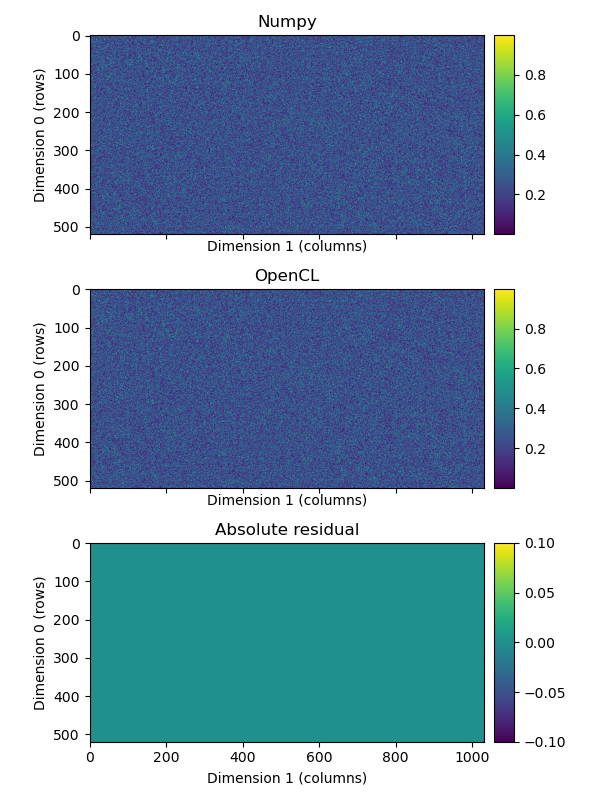

In [5]:
mat_mul.check_data()

## Tasks

1. Add a check so that the progam will crash out if the runtime is not capable of using CL_DEVICE_SVM_FINE_GRAIN_BUFFER (copy paste from [mat_mult_fine_buffer_svm.cpp](mat_mult_fine_buffer_svm.cpp)).
1. Allocate memory for **array_F** using [clSVMAlloc](https://www.khronos.org/registry/OpenCL/sdk/3.0/docs/man/html/clSVMAlloc.html) instead. Don't forget the additional **CL_MEM_SVM_FINE_GRAIN_BUFFER** flag.
1. Remove buffer creation for **buffer_F**.
1. Replace clSetKernelArg with [clSetKernelArgSVMPointer](https://www.khronos.org/registry/OpenCL/sdk/3.0/docs/man/html/clSetKernelArgSVMPointer.html) for setting argument 2 in the kernel.
1. Remove the read of buffer_F back to the host.
1. Remove the call to clReleaseMemObject for buffer_F.
1. Use [clSVMFree](https://www.khronos.org/registry/OpenCL/sdk/3.0/docs/man/html/clSVMFree.html) to free memory for array_F instead of **free**.

### Answers

You can of course always look at the answer, in [mat_elementwise_svm_answer.cpp](mat_elementwise_svm_answer.cpp) and run the answer below.

In [8]:
!make; ./mat_elementwise_svm_answer.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864
Device supports fine-grained buffer SVM


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
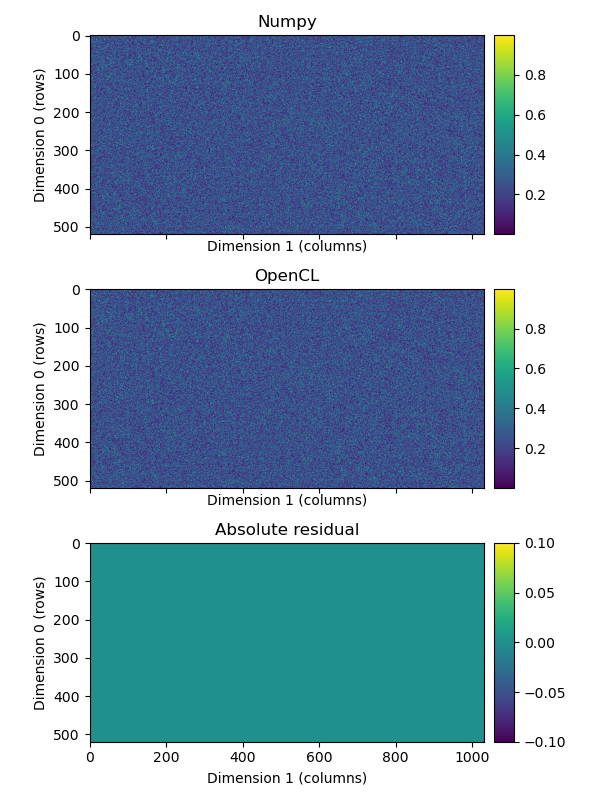

In [9]:
mat_mul.check_data()